In [45]:
import torch
import os
from catboost import CatBoostClassifier
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import silhouette_score

In [46]:
def plot_silhouette(model, data, param_name, s, e, k):
  ss = []
  e = np.arange(s, e, k)
  for i in tqdm(e):
      c = model(**{param_name: i}).fit(data)
      nc = np.unique(c.labels_).shape[0]
      if nc > 1 and nc < data.shape[0]:
        ss.append(silhouette_score(data, c.labels_))
  if len(ss):
    mv = np.argmin(ss)
    plt.plot(ss)
    plt.xticks(np.arange(len(e)), e)
    plt.axvline(mv, color='red', linestyle='-')
    print(e[mv])
  else:
    print('None')

In [47]:
vectors_path = './vectorized_torch_emb/'

In [48]:
list_of_tensors = os.listdir(vectors_path)

In [49]:
def get_index_from_name(name: str) -> int: return int(name.replace('.html.pt', '').split('_')[-1])

In [50]:
mean_value = list(map(lambda a: torch.load(vectors_path + a).mean(dim=0).detach().numpy(), list_of_tensors))
indexes = list(map(lambda a: get_index_from_name(a), list_of_tensors))

100%|██████████| 100/100 [00:05<00:00, 19.30it/s]


1e-07


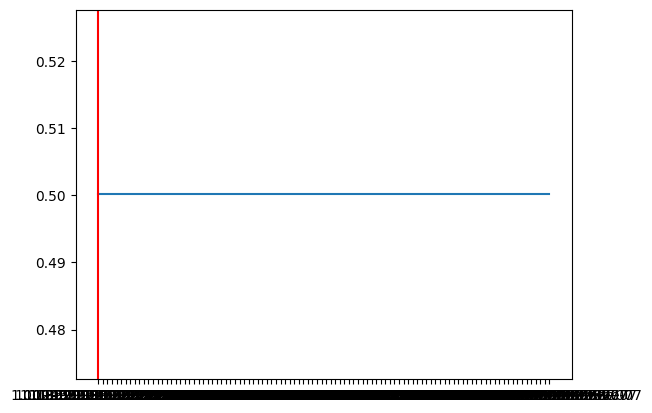

In [58]:
plot_silhouette(DBSCAN, np.array(mean_value), 'eps', 0.0000001, 0.0000002, 0.000000001)

In [62]:
x = KMeans(n_clusters=2).fit_predict(mean_value)
print(np.unique(np.array(indexes)[x==0]))
print(np.unique(np.array(indexes)[x==1]))
x

[ 0  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 26
 27 28 29 31 33 41]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 25 26 28 31]


array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [63]:
x = DBSCAN(eps=0.000000003).fit_predict(mean_value)
print(np.unique(np.array(indexes)[x==-1]))
print(np.unique(np.array(indexes)[x==0]))
x

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 25 26 28 31]
[ 0  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 26
 27 28 29 31 33 41]


array([-1, -1, -1,  0,  0, -1, -1, -1,  0,  0,  0, -1, -1,  0, -1, -1,  0,
       -1,  0, -1,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0, -1,  0,  0,
       -1, -1,  0, -1, -1, -1,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0, -1,
       -1,  0,  0,  0, -1,  0,  0,  0, -1, -1, -1, -1,  0,  0, -1, -1,  0,
       -1,  0, -1,  0, -1, -1, -1,  0,  0, -1, -1, -1,  0,  0, -1,  0,  0,
       -1,  0,  0, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0, -1, -1,  0, -1,
        0, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1,  0,
       -1,  0, -1,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1, -1,  0, -1, -1,
        0, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1,  0, -1,
        0, -1, -1,  0, -1, -1,  0,  0,  0, -1, -1,  0, -1, -1, -1,  0,  0,
        0,  0, -1,  0, -1,  0,  0, -1,  0,  0,  0, -1, -1, -1,  0, -1, -1,
       -1,  0,  0,  0, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1])